In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import torch
from models.transformer import Transformer

## Distributions

In [2]:
logdirs = [
    './logs/inverse_power/E128_H8_D8/', 
]
labels = [
    'Inverse Power'
]

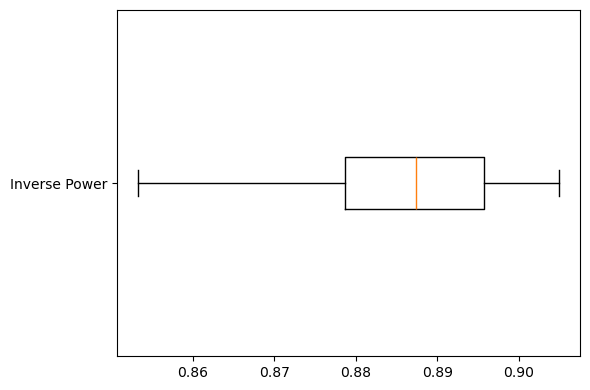

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))

log_scores = []

for logdir in logdirs:

    scores = []
    for logfile in os.listdir(logdir):
        if not logfile.endswith('.csv'): continue
        arr = pd.read_csv(logdir + logfile)['validation_r2']
        scores.append(arr[np.argpartition(arr, -4)[-4:]].mean())

    log_scores.append(scores)

ax.boxplot(
    log_scores, tick_labels=labels, 
    vert=False
)
plt.tight_layout()

## Weights

In [4]:
weightsdir = './weights/inverse_power/E128_H8_D8/'

(array([  6.,  14.,  63., 370.,  14.,  10.,   8.,   4.,   6.,   3.,   4.,
          1.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.14277448,  0.4148494 ,  0.68692428,  0.95899922,  1.23107409,
         1.50314903,  1.77522397,  2.04729891,  2.31937385,  2.59144855,
         2.86352348,  3.13559842,  3.40767336,  3.6797483 ,  3.95182323,
         4.22389793,  4.49597311,  4.76804781,  5.04012299,  5.31219769,
         5.58427286,  5.85634756,  6.12842226,  6.40049744,  6.67257214,
         6.94464731,  7.21672201,  7.48879719,  7.76087189,  8.03294659,
         8.30502224,  8.57709694,  8.84917164,  9.12124634,  9.39332104,
         9.66539669,  9.93747139, 10.20954609, 10.48162

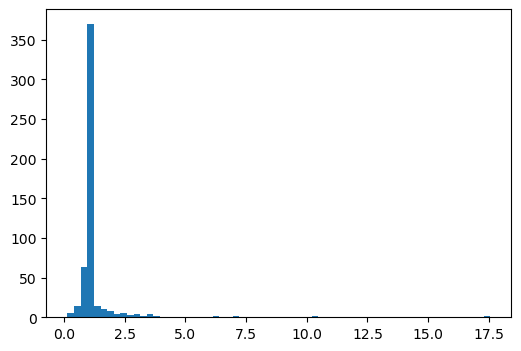

In [7]:
exponents = []
for weightsfile in os.listdir(weightsdir):
    if not weightsfile.endswith('.pt'): continue

    model = Transformer(
        in_features=6, 
        out_features=15, 
        E=128, H=8, D=8, 
        dropout=0.1, 
    )
    model.load_state_dict(torch.load(weightsdir + weightsfile, map_location=torch.device('cpu')))

    for i, transformer_block in enumerate(model.transformer_blocks):
        exponents += list(transformer_block.bias_scale.log_weight.exp().squeeze().detach())

fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(exponents, bins=64)